In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#input data dari csv
data= pd.read_csv("sample_data/adult.csv")
df= pd.DataFrame(data)

In [3]:
# cek 5 data pertama
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# liat informasi seperti jumlah kolom, baris, tipe data dll
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# mengubagah variabel categorical menajadi variabel quantitative
print(set(data['occupation']))
data['occupation'] = data['occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)


{'?', 'Priv-house-serv', 'Tech-support', 'Armed-Forces', 'Exec-managerial', 'Craft-repair', 'Other-service', 'Machine-op-inspct', 'Handlers-cleaners', 'Sales', 'Farming-fishing', 'Transport-moving', 'Protective-serv', 'Adm-clerical', 'Prof-specialty'}


In [6]:
# mengubah income menjadi 2 bagian yaitu yang gajinya diatas 50k dollar dan di bawah 50k dollar
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [7]:
# mengubah data sex menjadi 0 untuk laki-laki dan 1 untuk wanita
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [8]:
# data['race'] = data['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
#                                              'Amer-Indian-Eskimo': 4}).astype(int)

In [9]:
# data['marital.status'] = data['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
#                                                              'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
#                                                              'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [10]:
# mengubah nilai null menajadi 0
df.occupation.replace(0, np.nan, inplace=True)

In [11]:
# melihat berapa banyak yang hilang (yaitu 1843 data)
print(df.shape)
df=df.dropna()
print(df.shape)

(32561, 15)
(30718, 15)


In [12]:
# melihat kembali 5 data awal
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,7.0,Not-in-family,White,1,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,6.0,Unmarried,White,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,5.0,Own-child,White,1,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,13.0,Unmarried,White,1,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,3.0,Unmarried,White,0,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,5.0,Other-relative,White,1,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,5.0,Not-in-family,White,1,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,9.0,Unmarried,White,0,0,3004,60,?,1
10,45,Private,172274,Doctorate,16,Divorced,5.0,Unmarried,Black,1,0,3004,35,United-States,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,5.0,Not-in-family,White,0,0,2824,45,United-States,1


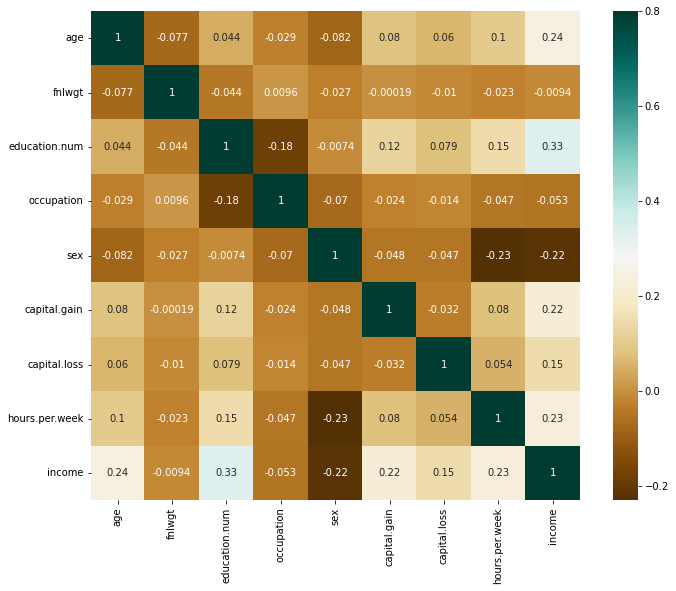

In [13]:
# melihat korelasi dari masing-masing feature / kolom
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

In [14]:
#KNN
from sklearn.model_selection import train_test_split
from sklearn import metrics

# mengambil data education number, age, dan hourse per week saja
X= df[['education.num','age','hours.per.week']].values
y= df[['income']].values

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# memisahkan data test dan train menjadi 30% data test
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=21, stratify=y)

# membuat model dan melatih model
model = KNeighborsClassifier(n_neighbors=78) 
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy of the KNN is 0.7944878472222222


In [16]:
import pickle

# menyimpan model menggunakan library pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))